In [1]:
%matplotlib inline
import sys
sys.path.append("..")
from d2l import torch as d2l
import torch
import random

In [2]:
#@save
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)
true_w = torch.tensor([2, -3.4])
true_b = torch.tensor(4.2)
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\n label:', labels[0])

features: tensor([1.5522, 1.6141]) 
 label: tensor([1.8179])


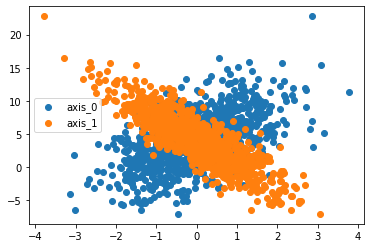

In [4]:
d2l.plt.scatter(features[:, 0].numpy(), labels.numpy(), label='axis_0')
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), label='axis_1')
d2l.plt.legend()

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4388, -0.0542],
        [ 0.4000,  0.7186],
        [ 2.2004, -0.5677],
        [ 1.1060, -0.3568],
        [-0.4205, -0.1366],
        [-0.4468,  1.2133],
        [ 0.1174, -0.5807],
        [ 0.9320,  0.9561],
        [-0.9239, -0.1784],
        [ 0.0264,  1.0325]]) 
 tensor([[ 5.2632],
        [ 2.5474],
        [10.5335],
        [ 7.6121],
        [ 3.8111],
        [-0.8259],
        [ 6.4175],
        [ 2.8131],
        [ 2.9568],
        [ 0.7443]])


In [7]:
def linreg(X, w, b): #@ save
    return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y): #@save
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [9]:
def sgd(params, lr, batch_size): #@save
    for param in params:
        param.data -= lr*param.grad / batch_size
        param.grad.zero_()

In [10]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch  in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'w = {w.numpy()}, b = {b.numpy()}, epoch {epoch+1}, loss {float(train_l.mean()):f}')

w = [[ 1.9270432]
 [-3.2302155]], b = [3.9966495], epoch 1, loss 0.037417
w = [[ 1.9972492]
 [-3.3914793]], b = [4.1901393], epoch 2, loss 0.000137
w = [[ 1.9997222]
 [-3.3995407]], b = [4.1996326], epoch 3, loss 0.000053
